## Image Classification with 'Face Mask' data set

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.2'

In [4]:
print(tf.test.is_built_with_gpu_support())

True


In [5]:
# Importing the libraries
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, Input, Flatten, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
import os
from glob import glob
import  PIL
from PIL import Image
from imutils import paths
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

# Load & Preprocess the data

Steps in Data Preprocessing
1. Load the data.
2. Convert the images to gray scaled with size of (128, 128)
3. Normalized the dataset.
4. Reshape the dataset to 4D whcih is acceptible by CNN
5. Split the data into Training and Validatin sets
6. Augmentation on Training data

In [ ]:
img_size = 128
batch_size = 32

In [ ]:
data_path = r'D:\DLCVNLP\Projects\Mask_detection'

In [12]:
%%time
data = []
labels = []

for folder in folders:
    image_paths = list(paths.list_images(folder))
    for images in image_paths:
        image = load_img(images, color_mode='grayscale', target_size=(img_size, img_size))
        label = images.split(os.path.sep)[-2]
        labels.append(label)
        data.append((np.array(image))/255.0)   

d:\downloads\anaconda3\envs\tracker-gpu\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Wall time: 27.1 s


In [13]:
print(type(data), type(labels))

<class 'list'> <class 'list'>


In [14]:
%%time
data = np.array(data, dtype='float32')
labels = np.array(labels)

Wall time: 138 ms


In [38]:
data.shape

(3833, 128, 128)

In [15]:
data_reshape = np.reshape(data, (data.shape[0], img_size, img_size, 1))

In [16]:
# Labels data to Categorical
lb =LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [17]:
labels.shape

(3833, 2)

In [18]:
print(len(data), len(labels))

3833 3833


In [19]:
# split the data 
train_X, test_X, train_y, test_y = train_test_split(data_reshape, labels, test_size=0.2, stratify=labels, random_state=42)

In [20]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(3066, 128, 128, 1) (3066, 2) (767, 128, 128, 1) (767, 2)


In [ ]:
augmentor =ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')


## Train with Convolution neural network

In [18]:
from tensorflow.keras.layers import Conv2D, Activation, AvgPool2D, MaxPool2D

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (img_size, img_size, 1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(2))
model.add(Activation("softmax"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 250)       144250    
_________________________________________________________________
activation_2 (Activation)    (None, 59, 59, 250)      

In [ ]:
model.compile(optimizer=optim, loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['categorical_accuracy'])

In [178]:
result = model.fit(augmentor.flow(train_X, train_y, batch_size=batch_size), epochs=40, validation_data=(test_X, test_y), 
                   callbacks=[early_stopping, learning_rate, model_ckpt],
         steps_per_epoch = len(train_X)//batch_size, validation_steps = len(test_X)//batch_size)

  ...
    to  
  ['...']
Train for 95 steps, validate on 767 samples
Epoch 1/40
94/95 [============================>.] - ETA: 0s - loss: 0.6848 - categorical_accuracy: 0.5250
Epoch 00001: val_loss did not improve from 0.12200
95/95 [==============================] - 6s 66ms/step - loss: 0.6841 - categorical_accuracy: 0.5267 - val_loss: 0.5915 - val_categorical_accuracy: 0.6821
Epoch 2/40
94/95 [============================>.] - ETA: 0s - loss: 0.6287 - categorical_accuracy: 0.6502
Epoch 00002: val_loss did not improve from 0.12200
95/95 [==============================] - 6s 61ms/step - loss: 0.6288 - categorical_accuracy: 0.6506 - val_loss: 0.5550 - val_categorical_accuracy: 0.7351
Epoch 3/40
94/95 [============================>.] - ETA: 0s - loss: 0.5882 - categorical_accuracy: 0.7025
Epoch 00003: val_loss did not improve from 0.12200
95/95 [==============================] - 6s 62ms/step - loss: 0.5881 - categorical_accuracy: 0.7017 - val_loss: 0.5168 - val_categorical_accuracy: 0.752

Epoch 27/40
94/95 [============================>.] - ETA: 0s - loss: 0.1658 - categorical_accuracy: 0.9374
Epoch 00027: val_loss improved from 0.12200 to 0.11647, saving model to ./face_mask_model.h5
95/95 [==============================] - 6s 63ms/step - loss: 0.1667 - categorical_accuracy: 0.9370 - val_loss: 0.1165 - val_categorical_accuracy: 0.9606
Epoch 28/40
94/95 [============================>.] - ETA: 0s - loss: 0.1474 - categorical_accuracy: 0.9467
Epoch 00028: val_loss did not improve from 0.11647
95/95 [==============================] - 6s 62ms/step - loss: 0.1485 - categorical_accuracy: 0.9459 - val_loss: 0.1387 - val_categorical_accuracy: 0.9497
Epoch 29/40
94/95 [============================>.] - ETA: 0s - loss: 0.1471 - categorical_accuracy: 0.9417
Epoch 00029: val_loss improved from 0.11647 to 0.11244, saving model to ./face_mask_model.h5
95/95 [==============================] - 6s 63ms/step - loss: 0.1464 - categorical_accuracy: 0.9420 - val_loss: 0.1124 - val_categoric

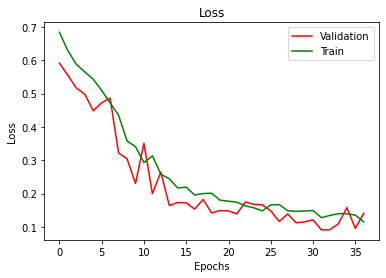

In [185]:
## Visualize Loss
plt.plot(result.history['val_loss'], c = 'red', label = 'Validation')
plt.legend()
plt.plot(result.history['loss'], c = 'green', label = 'Train')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

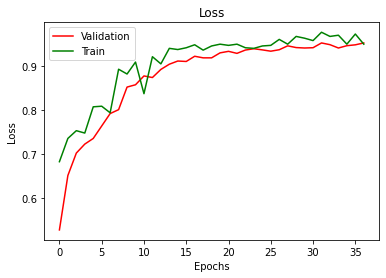

In [186]:
## Visualize Accuracy
plt.plot(result.history['categorical_accuracy'], c = 'red', label = 'Validation')
plt.legend()
plt.plot(result.history['val_categorical_accuracy'], c = 'green', label = 'Train')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [7]:
face_model = load_model('./face_mask_model.h5')

In [22]:
prediction = face_model.predict(test_X)

In [23]:
pred = np.argmax(prediction, axis = 1)

In [37]:
lb.classes_

array(['with_mask', 'without_mask'], dtype='<U12')

In [35]:
print(classification_report(np.argmax(test_y, axis=1), np.argmax(prediction, axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.96      0.99      0.98       383
without_mask       0.99      0.96      0.97       384

    accuracy                           0.98       767
   macro avg       0.98      0.98      0.98       767
weighted avg       0.98      0.98      0.98       767



In [36]:
# Loss and categorical accuracy on test data
face_model.evaluate(test_X, test_y, batch_size=batch_size, steps = 10, verbose =0)

[0.04845134647759807, 0.971875]